In [1]:
### JUPYTER NOTEBOOK / MODULE PATH FIX ###
import sys

if "/share/apps/python/3.8.6/intel/lib/python3.8" in sys.path and sys.path[1] == '':
    sys.path[1], sys.path[6] = sys.path[6], sys.path[1]

In [2]:
from jtb_2022_code import FigureSingleCellData
from jtb_2022_code.figure_2_supplemental import figure_2_supplement_1_plot, figure_2_supplement_2_plot
from jtb_2022_code.utils.figure_common import *
from jtb_2022_code.utils.adata_common import *
from jtb_2022_code.utils.pseudotime_common import *

In [3]:
## LOAD ###
data = FigureSingleCellData()
data.do_projections()
data.load_pseudotime()

### SELECT 15 DCs FROM PALANTIR: ###
def _dc_select(obsm_data, n_dcs=15):
    col_split = list(map(lambda x: x.split("_"), obsm_data.columns))
    keep_cols = [int(x[1]) == n_dcs for x in col_split]
    obsm_data = obsm_data.loc[:, keep_cols].copy()
    obsm_data.columns = [str(x[0]) + "_" + str(x[2]) 
                         for x, y in zip(col_split, keep_cols) if y]
    return obsm_data

def _fix_palantir(adata, obsm_key):
    nd = _dc_select(adata.obsm[obsm_key])
    adata.obsm[(obsm_key[0] + "_15", obsm_key[1])] = nd
    
data.apply_inplace_to_expts(_fix_palantir, ('palantir', False))

spearman_rho_grid(data, ('dpt', False), 'dpt_rho')
spearman_rho_grid(data, ('cellrank', False), 'cellrank_rho')
spearman_rho_grid(data, ('monocle', False), 'monocle_rho')
spearman_rho_grid(data, ('palantir_15', False), 'palantir_rho')

Reading Single Cell Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_1_fpr1.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_WT.h5ad
Reading Single Cell Experiment Data from /scratch/cj59/RAPA/2021_RAPA_TIMECOURSE_FIGS_2_fpr1.h5ad
Applying _fix_palantir to data [['1'], ['WT']] (63533, 5747)
Applying _fix_palantir to data [['1'], ['fpr1']] (4933, 5747)
Applying _fix_palantir to data [['2'], ['WT']] (98996, 5747)
Applying _fix_palantir to data [['2'], ['fpr1']] (5885, 5747)
Applying _calc_rhos to data [['1'], ['WT']] (63533, 5747)
Applying _calc_rhos to data [['1'], ['fpr1']] (4933, 5747)
Applying _calc_rhos to data [['2'], ['WT']] (98996, 5747)
Applying _calc_rhos to data [['2'], ['fpr1']] (5885, 5747)
Applying _calc_rhos to data [['1'], ['WT']] (63533, 

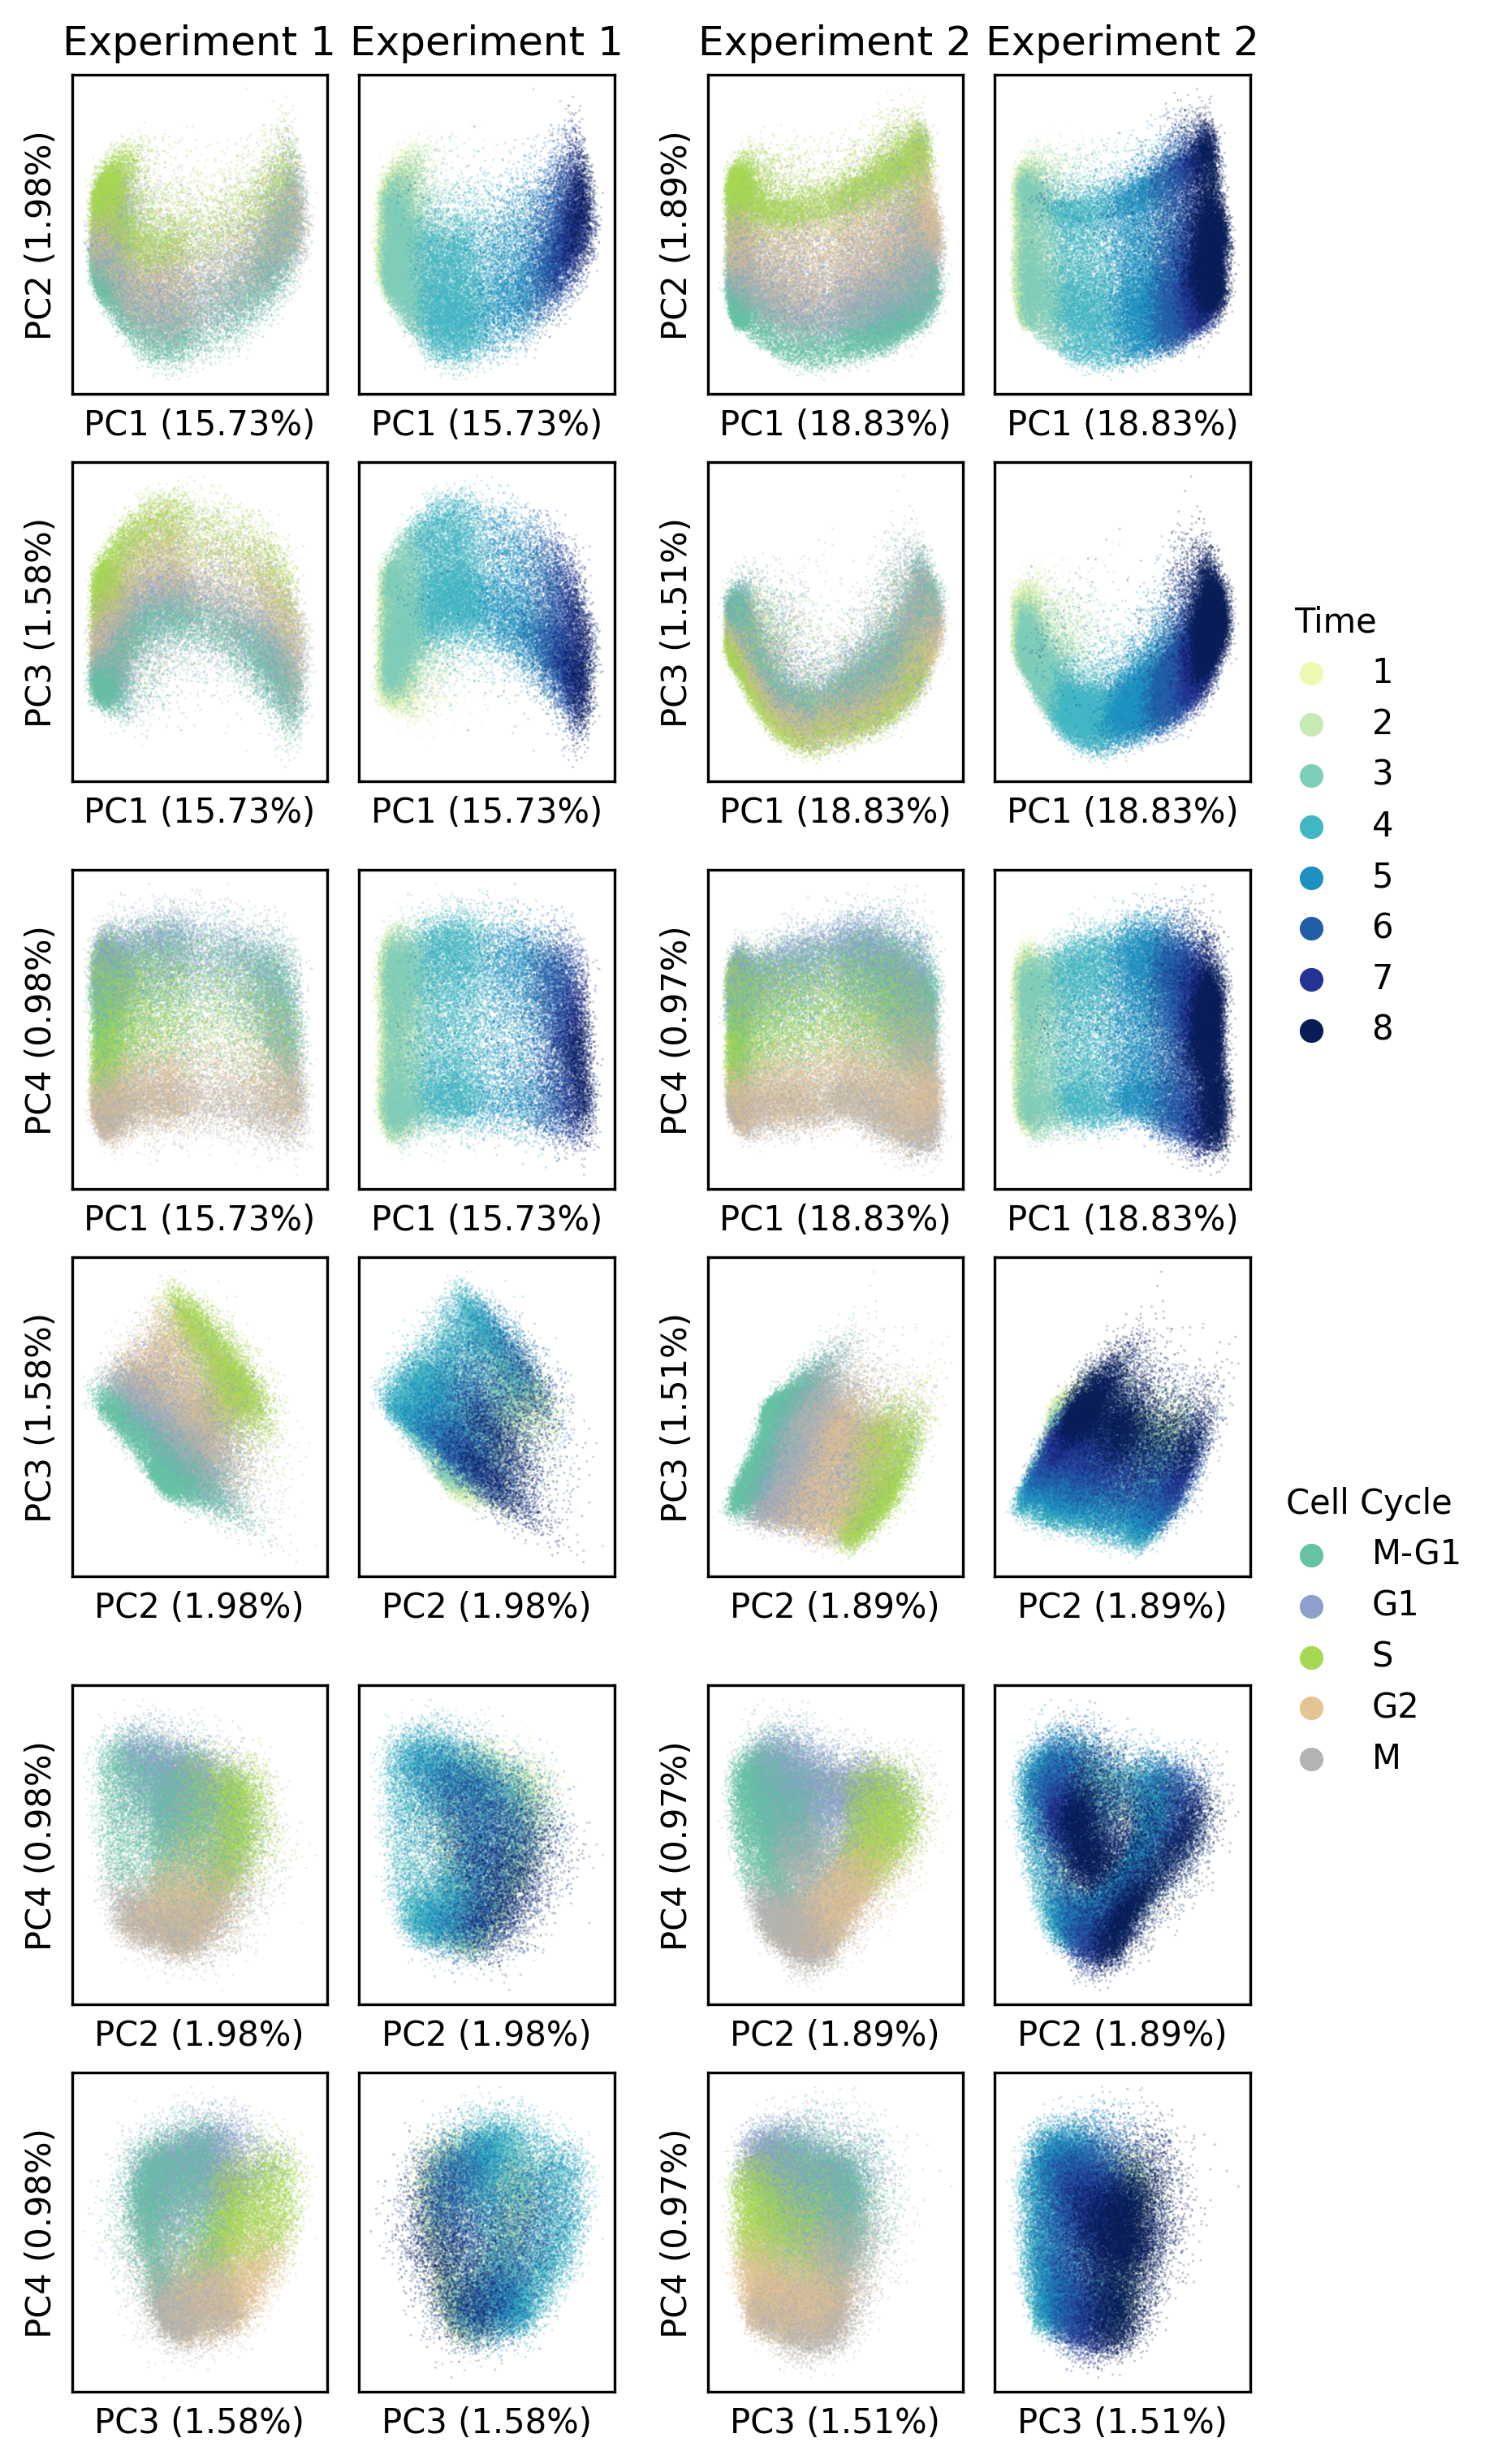

In [4]:
fig1 = figure_2_supplement_1_plot(data)

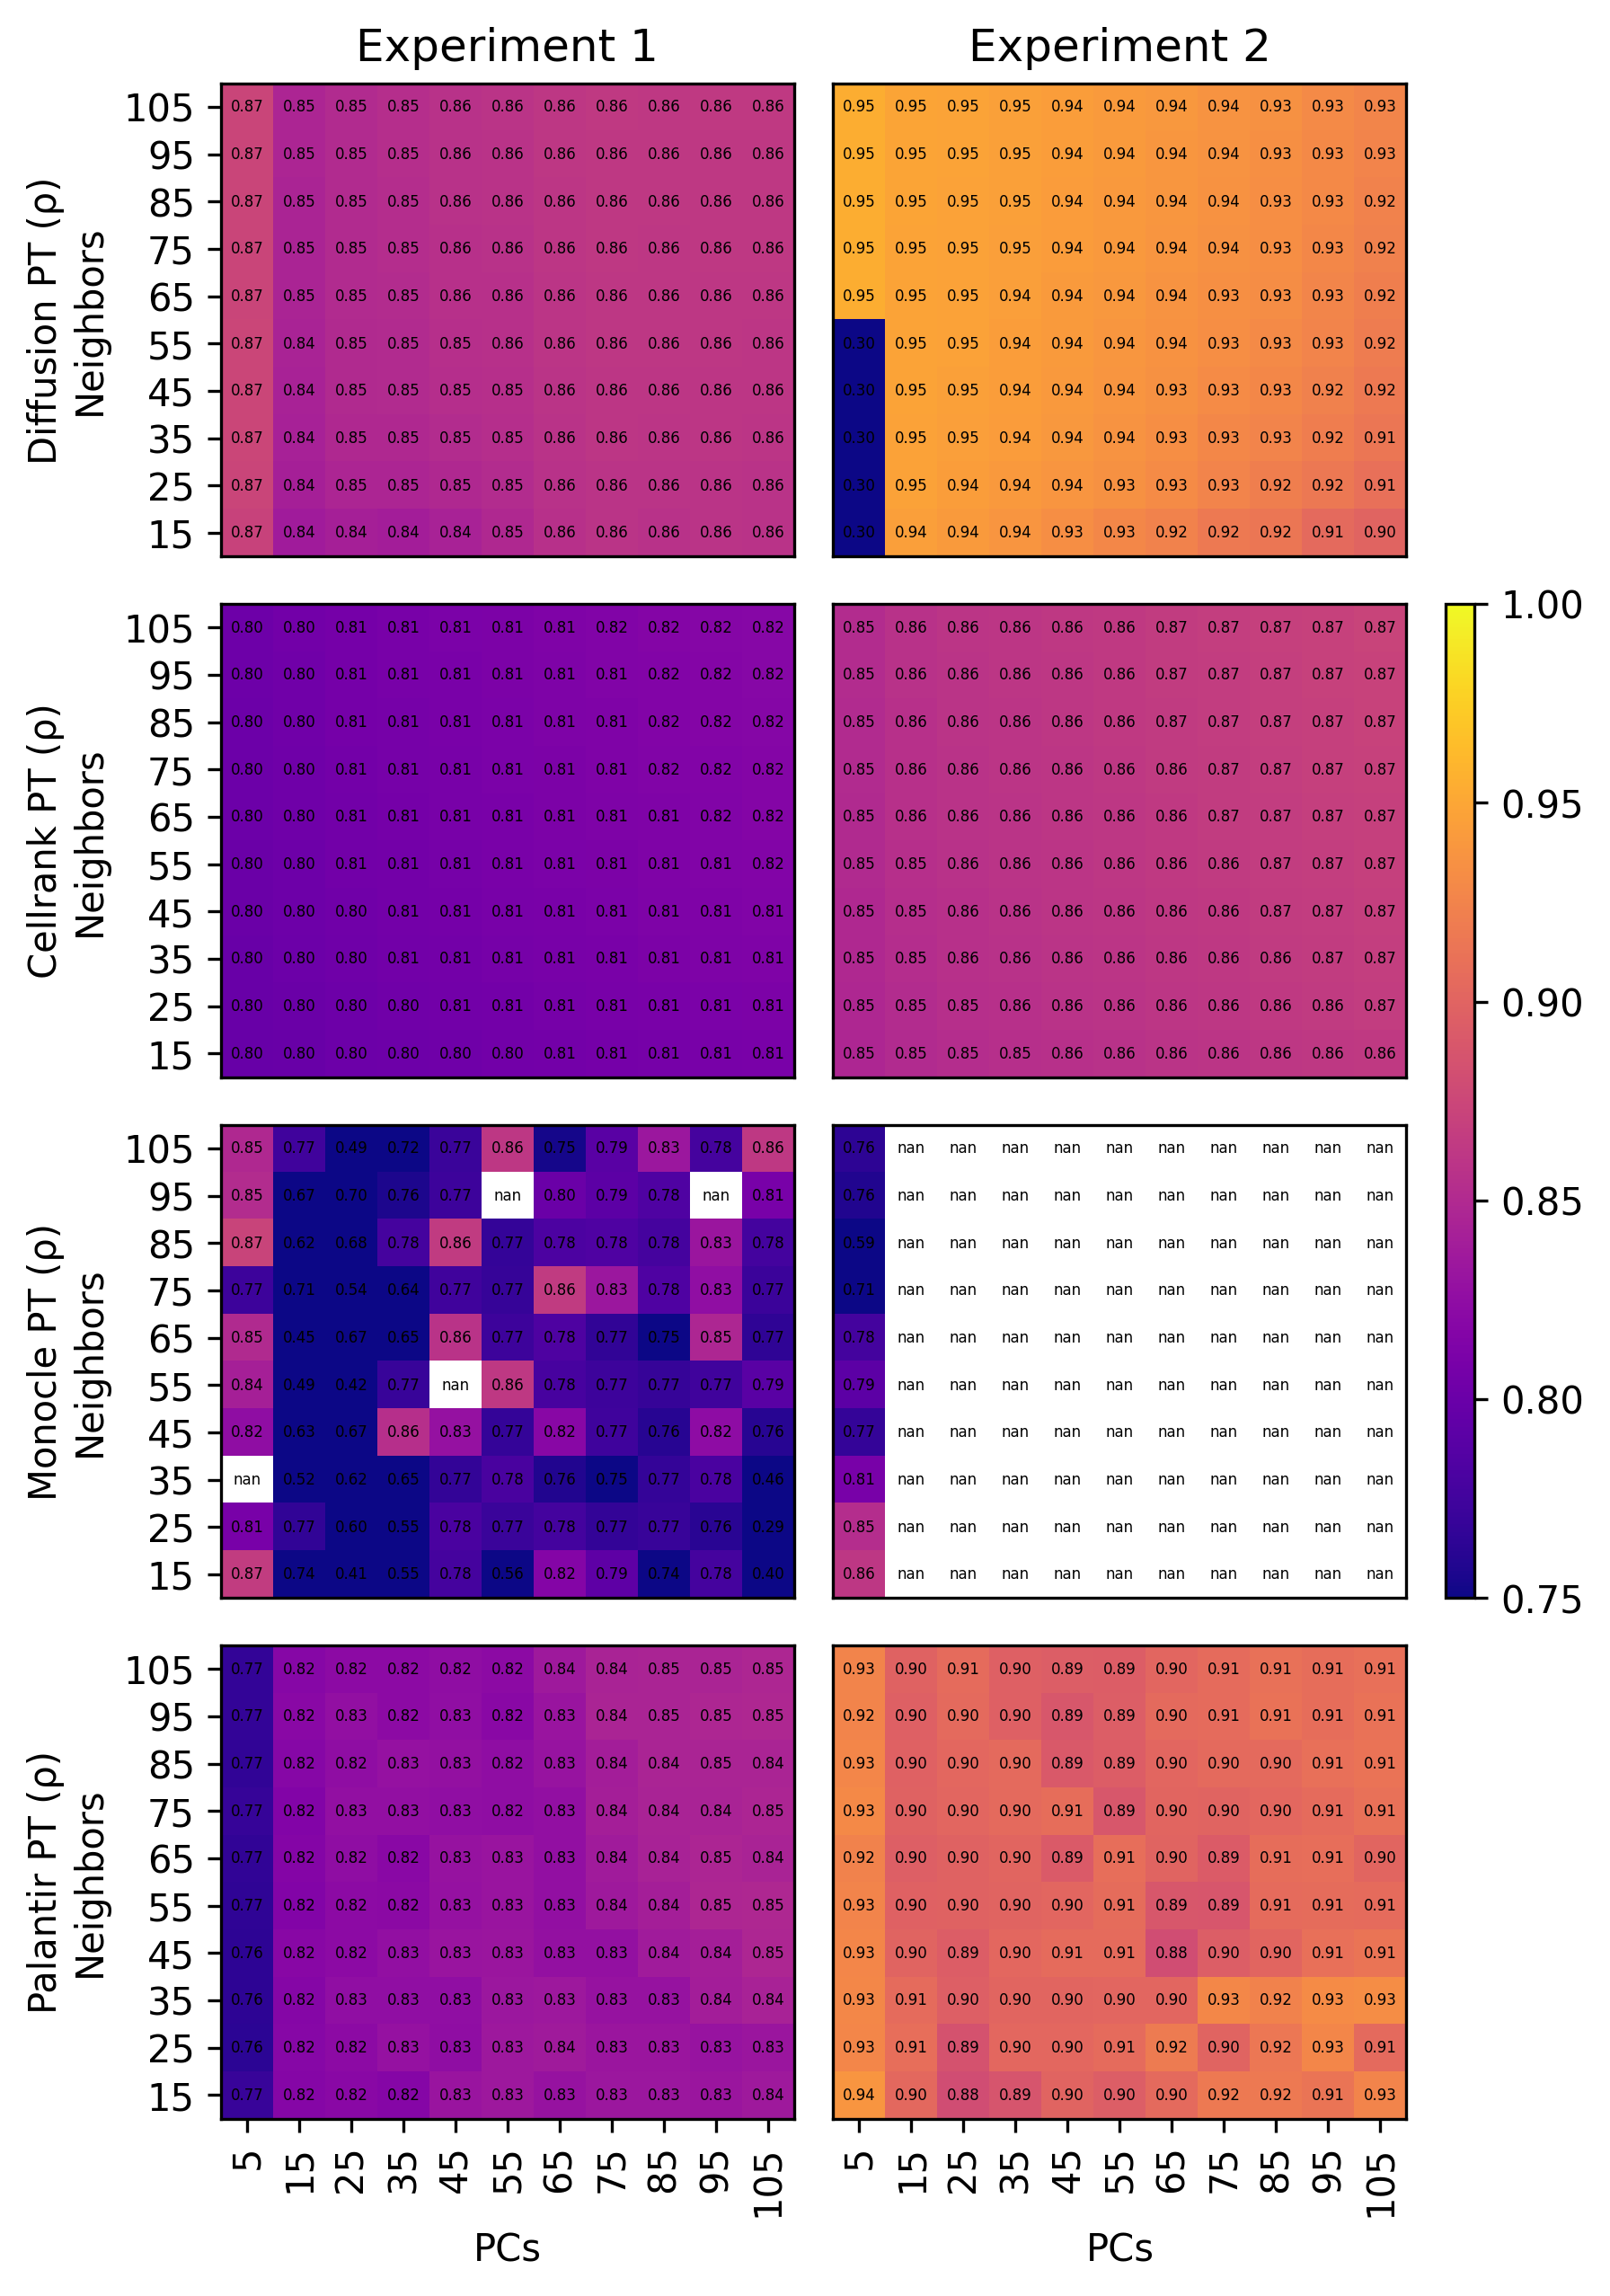

In [5]:
fig2 = figure_2_supplement_2_plot(data)